# Assignment 2 - Machine Learning Basics

## *Xingyu Liu*
Netid:  *xl264*

Github link: *Link to the github repo with your completed assignment*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1.Better. A flexible method will fit the data closer and with the large sample size, would perform better than an inflexible approach.

2.Worse. A flexible method would overfit the small number of observations.

3.Better. With more degrees of freedom, a flexible method would fit better than an inflexible one.

4.Worse. A flexible method would fit to the noise in the error terms and increase variance.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a)1.This is a **regression** problem since the response variable 'salary' is continuous. 

2.Since we want to understanding the influencing mechanism and which factors affect the salary, we are more interested in **inference**.

3.**n = 500; p = 3**

(b)1.This is a **classification** problem since the outcome is a binary one, which is either success or failure.

2.Since our goal is the know whether success or failure is gonna happen, we are more interested in **prediction**.

3.**n = 20; p = 13**

(c)1.Since the outcome, the percentage of change, is continuous, it is a **regression** problem.

2.The goal here is predicting the percentage of change, we are more interested in **prediction**.

3.**n = 52(since there are 52 weeks in 2012); p = 3**

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [1]:
# (a) Write your own kNN classifier

import numpy as np
from scipy.spatial.distance import cdist

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    #use cdist
    from scipy.spatial.distance import cdist
    def predict_cdist(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for i in range(x.shape[0]):
            tmp = np.array(x.iloc[i,:]).reshape(1,-1)
            #calculate the distance
            dist = cdist(self.x, tmp,'euclidean')
            #find the most frequend y in nearest k neighbots
            y_hat.append(self.y.iloc[dist.argsort(axis = 0)[:k].flatten(),0].mode()[0])
        # Return the estimated targets
        return y_hat
    
    #calculate the distance by hand
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for i in range(x.shape[0]):
            tmp = np.array(x.iloc[i,:])
            #calculate the distance
            dist = np.tile(tmp, x.shape[0]).reshape([x.shape[0],x.shape[1]])
            dist = (dist - self.x)**2
            dist = (np.sum(dist, axis = 1))**0.5
            #print(dist)
            #find the most frequend y in nearest k neighbots
            y_hat.append(self.y.iloc[dist.argsort(axis = 0)[:k],0].mode()[0])
        #Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    #accuracy = sum(y == y_hat) / nvalues
    same = 0
    for i in range(len(y_hat)):
        if y_hat[i] == y[i]:
            same += 1        
    accuracy = same / nvalues
    return accuracy

In [2]:
# (b) load the datasets
import pandas as pd
x_test_low = pd.read_csv('data/A2_X_test_low.csv', header = None)
x_train_low = pd.read_csv('data/A2_X_train_low.csv',header = None)
y_test_low = pd.read_csv('data/A2_y_test_low.csv',header = None)
y_train_low = pd.read_csv('data/A2_y_train_low.csv',header = None)
x_test_high = pd.read_csv('data/A2_X_test_high.csv', header = None)
x_train_high = pd.read_csv('data/A2_X_train_high.csv',header = None)
y_test_high = pd.read_csv('data/A2_y_test_high.csv',header = None)
y_train_high = pd.read_csv('data/A2_y_train_high.csv',header = None)

In [3]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#  and time the predictions of each
# low-dimensional dataset
import time
knn_low = Knn()
knn_low.fit(x_train_low,y_train_low)
k = 5
y_low = y_test_low[0].values.ravel()
start_low = time.clock()
y_hat_low = knn_low.predict(x_test_low, k)
#y_hat_low_cdist = knn_low.predict(x_test_low, k)
time_low = time.clock() - start_low
accuracy_low = accuracy(y_low, y_hat_low)
print('On low-dimensional dataset')
print('Computing time(second) for Knn by hand:',time_low)
print('Prediction accuracy for Knn by hand:',accuracy_low)

On low-dimensional dataset
Computing time(second) for Knn by hand: 1.698658
Prediction accuracy for Knn by hand: 0.925


In [4]:
# high-dimensional dataset
import time
knn_high = Knn()
knn_high.fit(x_train_high,y_train_high)
k = 5
y_high = y_test_high[0].values.ravel()
start_high = time.clock()
y_hat_high = knn_high.predict(x_test_high, k)
time_high = time.clock() - start_high
accuracy_high = accuracy(y_high, y_hat_high)
print('On high-dimensional dataset')
print('Computing time(second) for Knn by hand:',time_high)
print('Prediction accuracy for Knn by hand:',accuracy_high)

On high-dimensional dataset
Computing time(second) for Knn by hand: 9.219911
Prediction accuracy for Knn by hand: 0.993


In [5]:
#(d) Compare with sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
time_sklearn_low_start = time.clock()
neighClassifier = KNeighborsClassifier(n_neighbors=k)
#low dimension
neighClassifier.fit(x_train_low, y_train_low.values.ravel())
y_sk_low = neighClassifier.predict(x_test_low)
time_sklearn_low = time.clock() - time_sklearn_low_start
accuracy_sklearn_low = accuracy_score(y_pred = y_sk_low, y_true = y_test_low.values.ravel())
print('On low-dimensional dataset')
print('Computing time(second) for Knn from sklearn:',time_sklearn_low)
print('Prediction accuracy for Knn by hand:',accuracy_sklearn_low)

On low-dimensional dataset
Computing time(second) for Knn from sklearn: 0.005836000000000396
Prediction accuracy for Knn by hand: 0.925


In [6]:
time_sklearn_high_start = time.clock()
#high dimension
neighClassifier.fit(x_train_high, y_train_high.values.ravel())
y_sk_high = neighClassifier.predict(x_test_high)
time_sklearn_high = time.clock() - time_sklearn_high_start
accuracy_sklearn_high = accuracy_score(y_pred = y_sk_high, y_true = y_test_high.values.ravel())
print('On low-dimensional dataset')
print('Computing time(second) for Knn from sklearn:',time_sklearn_high)
print('Prediction accuracy for Knn by hand:',accuracy_sklearn_high)

On low-dimensional dataset
Computing time(second) for Knn from sklearn: 0.22331900000000005
Prediction accuracy for Knn by hand: 0.993


(e)1.Cannot make real-time analysis since speed really matters in this case. For example, credit fraut detection.

2.It is computationally expensive.

3.It can be expensive to assess model by cross validation.

4.It is also expensive to tune the models.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [7]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [8]:
test_point = np.array([0, 0, 0])
test_dist = np.tile(test_point, X.shape[0]).reshape([X.shape[0],X.shape[1]])
test_dist = np.sum((test_dist - X)**2, axis = 1)**0.5
test_dist = pd.DataFrame(test_dist.reshape(-1,1), columns=['distance'])
test_dist.index.name = 'obs'

In [9]:
test_dist

,distance
obs,
0,3.000000
1,2.000000
2,3.162278
3,2.236068
4,1.414214
5,1.732051


In [10]:
#（b）K = 1
idx1 = np.array(test_dist).argmin()
print('Prediction with K = 1:', y[idx1])

Prediction with K = 1: b


When K = 1, the prediction is b(Blue), because test point is closest to observation 5 in Euclidean distance. And since the color of observation 5 is blue, the prediction will be blue.

In [11]:
#（c）K = 3
import warnings
from scipy.stats import mode
warnings.filterwarnings('ignore')
idx3 = np.array(test_dist).argsort(axis = 0)[:3]
pred3 = mode(y[idx3])[0][0][0]
print('Prediction with K = 3:', pred3)

Prediction with K = 3: r


When K = 3, the prediction is r(Red), 3 nearest neighbors od test point is observation 5, observation 6 and observation 2. Since observation 5 is blue, observation 6 is red and observation 2 is red, red the most frequent in this case. Thus the prediction will be red.

(d)
As K becomes larger, the boundary becomes inflexible (linear). So in this case we would expect the best value for K to be small.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [12]:
#（a） create synthetic dataset
from sklearn.datasets import make_moons
syn_x, syn_y = make_moons(n_samples = 1000, noise = 0.35, random_state = 888)

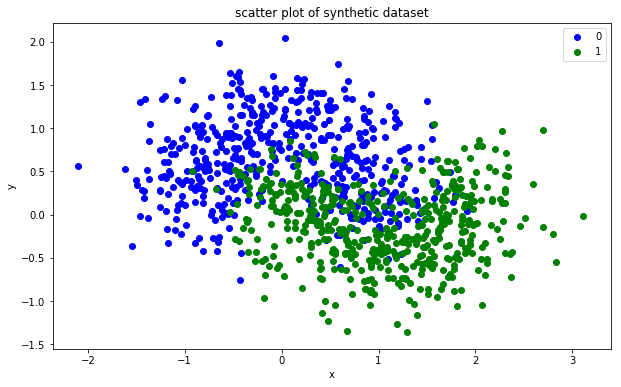

In [13]:
#(b)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(syn_x[syn_y == 0][:,0], syn_x[syn_y == 0][:,1], c = 'b', label = '0')
plt.scatter(syn_x[syn_y == 1][:,0], syn_x[syn_y == 1][:,1], c = 'g', label = '1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot of synthetic dataset')
plt.legend()
plt.show()

In [14]:
#(c)
#create 3 random 100 sample dataset
import random
syn_df = pd.concat([pd.DataFrame(syn_x, columns=['x1','x2']),pd.DataFrame(syn_y, columns=['y'])], axis = 1)
sample1 = syn_df.sample(100,random_state=123)
sample2 = syn_df.sample(100,random_state=974)
sample3 = syn_df.sample(100,random_state=329)

In [15]:
#fit model for sample1
s1_x_train = sample1[['x1','x2']]
s1_y_train = sample1['y']
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_25 = KNeighborsClassifier(n_neighbors = 25)
knn_50 = KNeighborsClassifier(n_neighbors = 50)
s1_knn_1 = knn_1.fit(s1_x_train,s1_y_train)
s1_knn_25 = knn_25.fit(s1_x_train,s1_y_train)
s1_knn_50 = knn_50.fit(s1_x_train,s1_y_train)

In [16]:
#fit model for sample2
s2_x_train = sample2[['x1','x2']]
s2_y_train = sample2['y']
s2_knn_1 = knn_1.fit(s2_x_train,s2_y_train)
s2_knn_25 = knn_25.fit(s2_x_train,s2_y_train)
s2_knn_50 = knn_50.fit(s2_x_train,s2_y_train)

In [17]:
#fit model for sample3
s3_x_train = sample3[['x1','x2']]
s3_y_train = sample3['y']
s3_knn_1 = knn_1.fit(s3_x_train,s3_y_train)
s3_knn_25 = knn_25.fit(s3_x_train,s3_y_train)
s3_knn_50 = knn_50.fit(s3_x_train,s3_y_train)

In [18]:
#(d)decision boundry function
def plotDecisionBoundary(ax,X,y,knn): 
    #get reference from sklean.neighbors.knnclassifier document (https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    step = 0.02 #step size in the mesh
    x1_min, x1_max = X.iloc[:,0].min() - 1,X.iloc[:,0].max() + 1
    x2_min, x2_max = X.iloc[:,1].min() - 1,X.iloc[:,1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, step),
                          np.arange(x2_min, x2_max, step))
    z = knn.predict(np.c_[x1.ravel(),x2.ravel()])
    z = z.reshape(x1.shape)
    #ax.figure()
    ax.pcolormesh(x1, x2, z, cmap=cmap_light)
    ax.scatter(X.iloc[:,0],X.iloc[:,1], c=y,cmap=cmap_bold,
                edgecolor='k', s=20, label=y.unique())

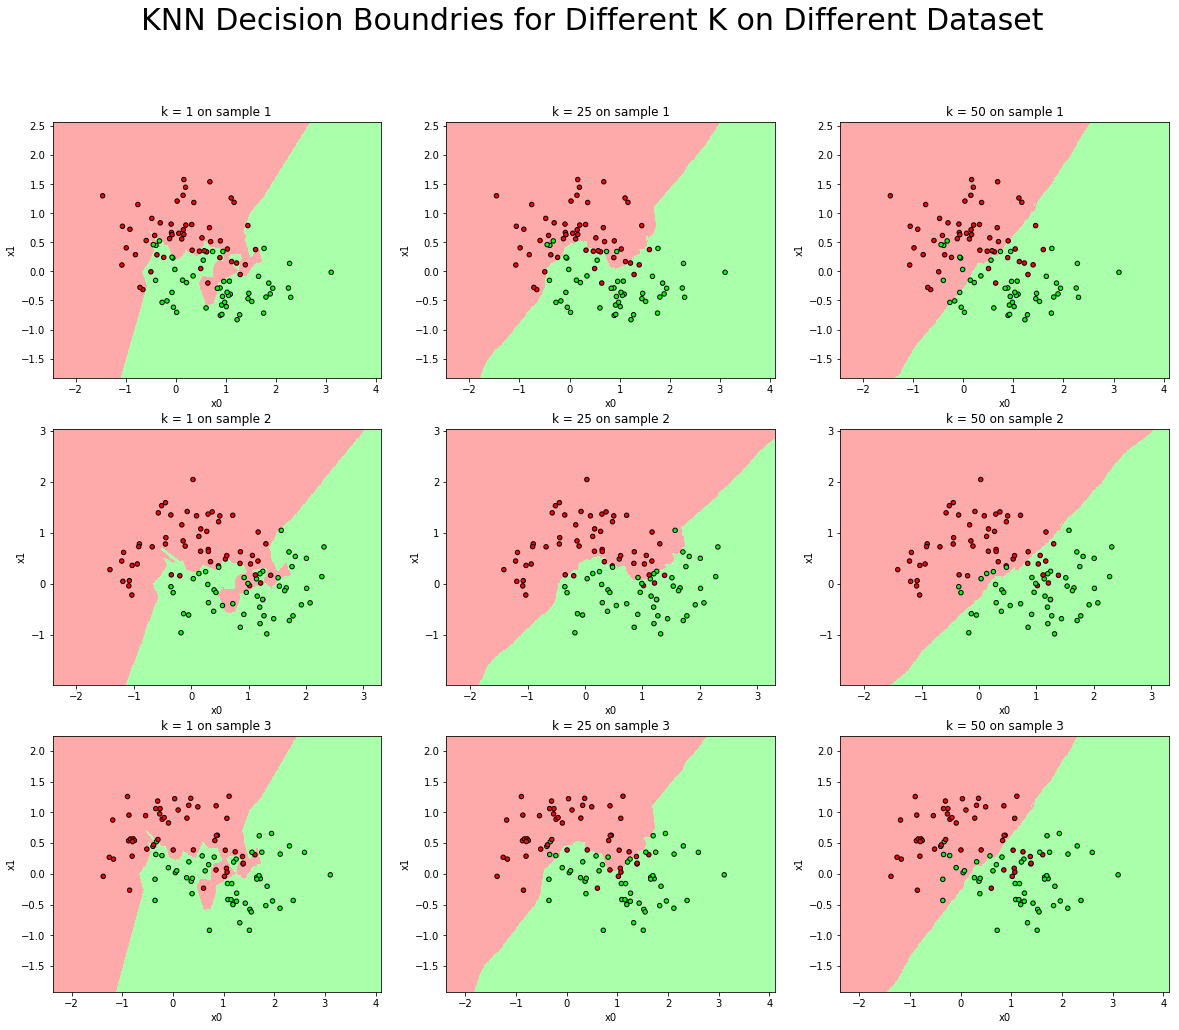

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
plotDecisionBoundary(axes[0,0],s1_x_train,s1_y_train,s1_knn_1)
axes[0,0].set_title('k = 1 on sample 1')
axes[0,0].set_xlabel('x0')
axes[0,0].set_ylabel('x1')
plotDecisionBoundary(axes[0,1],s1_x_train,s1_y_train,s1_knn_25)
axes[0,1].set_title('k = 25 on sample 1')
axes[0,1].set_xlabel('x0')
axes[0,1].set_ylabel('x1')
plotDecisionBoundary(axes[0,2],s1_x_train,s1_y_train,s1_knn_50)
axes[0,2].set_title('k = 50 on sample 1')
axes[0,2].set_xlabel('x0')
axes[0,2].set_ylabel('x1')
plotDecisionBoundary(axes[1,0],s2_x_train,s2_y_train,s2_knn_1)
axes[1,0].set_title('k = 1 on sample 2')
axes[1,0].set_xlabel('x0')
axes[1,0].set_ylabel('x1')
plotDecisionBoundary(axes[1,1],s2_x_train,s2_y_train,s2_knn_25)
axes[1,1].set_title('k = 25 on sample 2')
axes[1,1].set_xlabel('x0')
axes[1,1].set_ylabel('x1')
plotDecisionBoundary(axes[1,2],s2_x_train,s2_y_train,s2_knn_50)
axes[1,2].set_title('k = 50 on sample 2')
axes[1,2].set_xlabel('x0')
axes[1,2].set_ylabel('x1')
plotDecisionBoundary(axes[2,0],s3_x_train,s3_y_train,s3_knn_1)
axes[2,0].set_title('k = 1 on sample 3')
axes[2,0].set_xlabel('x0')
axes[2,0].set_ylabel('x1')
plotDecisionBoundary(axes[2,1],s3_x_train,s3_y_train,s3_knn_25)
axes[2,1].set_title('k = 25 on sample 3')
axes[2,1].set_xlabel('x0')
axes[2,1].set_ylabel('x1')
plotDecisionBoundary(axes[2,2],s3_x_train,s3_y_train,s3_knn_50)
axes[2,2].set_title('k = 50 on sample 3')
axes[2,2].set_xlabel('x0')
axes[2,2].set_ylabel('x1')
plt.suptitle('KNN Decision Boundries for Different K on Different Dataset',size = 30)
plt.show()

(e)

For the left column, the boundry change a lot on different dataset. For the middle column, the boundry change a little on different dataset. For the right column, the boundry looks almost the same.The decision boundry with same k on different sample set looks similar but in the same but different columns, with different k on same sample set, plots are different. As k increase, from left to right, the boundry is more smooth and bias becomes higher. As k decrease, from right to left, the boundry is more rough and the variance becomes higher.

The decision boundry of k = 25 best seperate.

The decision boundry on the left(k = 1) vary most.

(f)

In this case, As k increase, from left to right, the boundry is more smooth and bias becomes higher and variance becomes lower. As k decrease, from right to left, the boundry is more rough and the variance becomes higher and bias becomes lower. There seems to be a obvious tradeoff between variance and bias and they change in opposite direction.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [20]:
#(a) generate random samoles
test_set_x, test_set_y = make_moons(n_samples = 1000, noise = 0.35, random_state = 1276)

In [21]:
#(b)
error = []
for k in range(1,501):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(syn_x, syn_y)
    temp_pred = clf.predict(test_set_x)
    temp_error = 1-accuracy_score(y_pred=temp_pred, y_true = test_set_y)
    error.append(temp_error)

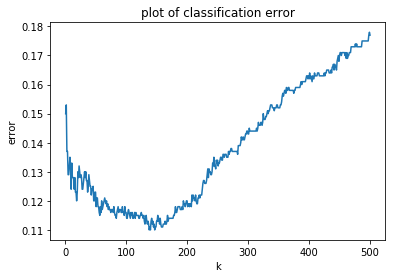

In [22]:
#plot
plt.plot(range(1,501),error)
plt.title('plot of classification error')
plt.xlabel('k')
plt.ylabel('error')
plt.show()

(c) From the plot above, we can see that as the k increase the classification error first decrease but then increase at some point, somewhere around 150. 

(d) High bias: Very small k (the left-most part of the plot)

High variance: Very large k (the right-most part of the plot)

In [23]:
#(e)
print('Minimum error =',min(error))
print('optimal k =',error.index(min(error))+1)

Minimum error = 0.11
optimal k = 138


(e) From the code above, we find we achieve the minimum error of 0.11 when k equals 138. This shows the optimal k should be 138. Moreover, knn model with k of 138 can also achieve a balance of variance and bias and yields the best prediction accuracy.

(f)
1.Decision Tree: the maximum depth of the tree, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node

2.Random Forest: number of trees in the forest, maximum depth of the tree, the maximum depth of the tree, the minimum number of samples required to be at a leaf node, the minimum number of samples required to split an internal node

3.Neural Network: the number of hidden layers, the number of neurons in the hidden layers

4.Support Vector Machine: penalty parameter C of the error term

5.KMeans: the number of clusters

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [24]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

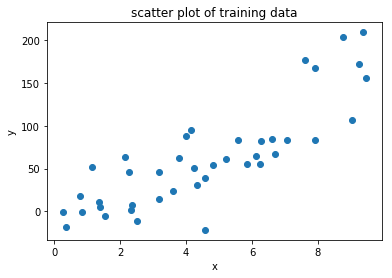

In [25]:
#(a) scatter plot
plt.scatter(x_train,y_train)
plt.title('scatter plot of training data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
#(b) linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
print('model: y = %f + %fx'%(reg.intercept_,reg.coef_))
print('R^2 =', reg.score(X=np.array(x_train).reshape(-1,1),y=np.array(y_train).reshape(-1,1)))
reg_estimate = reg.predict(np.array(x_train).reshape(-1,1))
print('MSE =', mean_squared_error(y_pred = reg_estimate, y_true = np.array(y_train).reshape(-1,1)))

model: y = -21.730783 + 18.303207x
R^2 = 0.701459091381
MSE = 1052.58536625


In [27]:
#(c) log(x) transformation
import math
log_x_train = [math.log(x) for x in x_train]
log_x_test = [math.log(x) for x in x_test]
log_X_train = np.c_[np.array(x_train),np.array(log_x_train)]
log_X_test = np.c_[np.array(x_test),np.array(log_x_test)]
#fit the model
reg_log = LinearRegression().fit(log_X_train,y_train)
print('model: y = %f + %fx %flog(x)'%(reg_log.intercept_, reg_log.coef_[0], reg_log.coef_[1]))
print('R^2 =', reg_log.score(log_X_train,y = np.array(y_train).reshape(-1,1)))
reg_log_estimate = reg_log.predict(log_X_train)
print('MSE =', mean_squared_error(y_pred = reg_log_estimate, y_true = np.array(y_train).reshape(-1,1)))

model: y = -23.680150 + 25.082805x -23.330631log(x)
R^2 = 0.721945536985
MSE = 980.354954179


In [28]:
#(c) quadratic transformation
import math
quad_x_train = [x**2 for x in x_train]
quad_x_test = [x**2 for x in x_test]
quad_X_train = np.c_[np.array(x_train),np.array(quad_x_train)]
quad_X_test = np.c_[np.array(x_test),np.array(quad_x_test)]
#fit the model
quad_reg = LinearRegression().fit(quad_X_train,y_train)
print('model: y = %f + %fx + %fx^2'%(quad_reg.intercept_, quad_reg.coef_[0], quad_reg.coef_[1]))
print('R^2 =', quad_reg.score(quad_X_train,y = np.array(y_train).reshape(-1,1)))
quad_reg_estimate = quad_reg.predict(quad_X_train)
print('MSE =', mean_squared_error(y_pred = quad_reg_estimate, y_true = np.array(y_train).reshape(-1,1)))

model: y = 8.007337 + 0.471007x + 1.832082x^2
R^2 = 0.749048071935
MSE = 884.797759661


After trying log transformation and quadratic transformation, I found the quadratic transformation fits better.

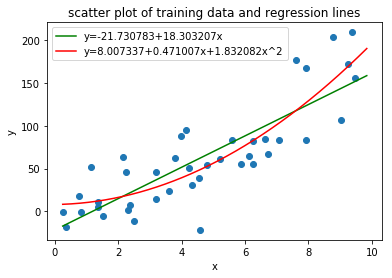

In [29]:
#(d)
x_plot = np.linspace(min(x_train),max(x_test)+1,500)
x_plot_quad = np.array([ i**2 for i in x_plot])
reg_plot = reg.coef_*x_plot+reg.intercept_
quad_reg_plot = quad_reg.intercept_+quad_reg.coef_[0]*x_plot+quad_reg.coef_[1]*x_plot_quad
plt.scatter(x_train,y_train)
plt.plot(x_plot,reg_plot.reshape(-1,1),'-r',c = 'g', label = 'y=-21.730783+18.303207x')
plt.plot(x_plot,quad_reg_plot,'-r',c = 'r', label = 'y=8.007337+0.471007x+1.832082x^2')
plt.title('scatter plot of training data and regression lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [30]:
#(e) apply model without transformation to test data
print('Model without transformation')
print('R^2 =', reg.score(X=np.array(x_test).reshape(-1,1),y=np.array(y_test).reshape(-1,1)))
reg_pred = reg.predict(np.array(x_test).reshape(-1,1))
print('MSE =', mean_squared_error(y_pred = reg_pred, y_true = np.array(y_test).reshape(-1,1)))

Model without transformation
R^2 = 0.555646588579
MSE = 2023.31210889


In [31]:
#apply model with transformation to test data
print('Model with quadratic transformation')
print('R^2 =', quad_reg.score(quad_X_test,y = np.array(y_test).reshape(-1,1)))
quad_reg_pred = quad_reg.predict(quad_X_test)
print('MSE =', mean_squared_error(y_pred = quad_reg_pred, y_true = np.array(y_test).reshape(-1,1)))

Model with quadratic transformation
R^2 = 0.692782008956
MSE = 1398.88175801


(f)
On both training set and test set, model with quadratic transformation performs better than model without transformation because its R^2 is higher and MSE is lower, which all show better preformance. 

(g) If the test data set is so significant different from the training set that the test data set is out of the realm of training data set, it will lead to extrapolation in prediction. Thus the prediction will be unreliable and predictive capacity will drop drastically.